# Display validation subset

For the results we want to display 2 phantoms: 
- 'good' reconstruction 
- 'bad' reconstruction 

We will use these reconstructions to point out the 'a model is only as good as it's data'

In [2]:
# | label: settings
#settings
objectSize = 32     # size of the object
nPixelsY = 64       # number of pixels in Y direction detector
nPixelsZ = 44       # number of pixels in Z direction detector
projections = 64    # number of projections
iterations = 40     # number of iterations

In [3]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np

objectSize = 32


with open('phantom_results_2.pkl', 'rb') as f:
    data = pickle.load(f)

reconstructions = data['reconstructions']
ys = data['ys']
phantoms = data['phantoms']
model_images = data['output_images']
times = data['times']
times_model = data['times_images']
rms_itt_bone = data['rms_reconstructions_bone']
rms_itt_water = data['rms_reconstructions_water']
rms_model_bone = data['rms_models_bone']
rms_model_water = data['rms_models_water']


In [4]:
def rms_error(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions")

    # Calculate the squared differences
    squared_diff = (image1 - image2) ** 2

    # Calculate the mean of the squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Return the square root of the mean squared difference
    return np.sqrt(mean_squared_diff)

def get_best_image(reconstruction, bone, water):

    # calculate RMS error for each image, return best bone, water pair
    best_rms = float('inf')
    best_bone = None
    best_water = None

    _, nMats, nIterates = reconstruction.shape
    images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order = 'F')    
    
    for i in range(nIterates):
        bone_reconstructed = images[:, :, :, 0, i]  # Maybe bone
        water_reconstructed = images[:, :, :, 1, i]  # Maybe water

        # Calculate RMS error
        rms_bone = rms_error(bone_reconstructed, bone)
        rms_water = rms_error(water_reconstructed, water)
        total_rms = rms_bone + rms_water
        if total_rms < best_rms:
            best_rms = total_rms
            best_bone = bone_reconstructed
            best_water = water_reconstructed
    
    return best_bone, best_water, best_rms

## display reconstructions and GT

In [5]:
# import interact, display for each index (as a slider) the final model_image, recon image and phantom
from ipywidgets import interact, FloatSlider, IntSlider, fixed

def display_images(index, itt):

    # get GT for water
    phantom = phantoms[index]  # Get the ith phantom
    phantom_water = phantom[1].transpose()  # Get the water phantom
    phantom_bone = phantom[0].transpose()  # Get the bone phantom

    # get best iterative image
    reconstruction = reconstructions[index]  # Get the ith reconstruction
    best_bone_image , best_water_image, rms = get_best_image(reconstruction, phantom_bone, phantom_water)

    # last iterative image
    _, nMats, nIterates = reconstruction.shape
    images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order = 'F')
    last_water_image = images[:, :, :, 1, -1]  # Get the last water image
    last_bone_image = images[:, :, :, 0, -1]  # Get the last bone image

    model_image = model_images[index][itt]  # Get the ith output image
    model_bone = model_image[0]  # Get the bone part of the model imag
    model_water = model_image[1]  # Get the water part of the model image

    # display ONLY water images
    plt.figure(figsize=(7, 4))
    plt.subplot(2, 4, 1)
    plt.imshow(phantom_water[:,:,objectSize//2], cmap='gray')
    plt.title(' (a)')
    plt.axis('off')
    plt.subplot(2, 4, 2)
    plt.imshow(best_water_image[:,:,objectSize//2], cmap='gray')
    plt.title(f' (b) ')
    plt.axis('off')
    plt.subplot(2, 4, 3)
    plt.imshow(last_water_image[:,:,objectSize//2], cmap='gray')
    plt.title(' (c) ')
    plt.axis('off')
    plt.subplot(2, 4, 4)
    plt.imshow(model_water[:,:,objectSize//2], cmap='gray')
    plt.title(f' (d) ')
    plt.axis('off')
    plt.subplot(2, 4, 5)
    plt.imshow(phantom_bone[:,:,objectSize//2], cmap='gray')
    plt.title(' (e)')
    plt.axis('off')
    plt.subplot(2, 4, 6)
    plt.imshow(best_bone_image[:,:,objectSize//2], cmap='gray')
    plt.title(f' (f) ')
    plt.axis('off')
    plt.subplot(2, 4, 7)
    plt.imshow(last_bone_image[:,:,objectSize//2], cmap='gray')
    plt.title(' (g) ')
    plt.axis('off')
    plt.subplot(2, 4, 8)
    plt.imshow(model_bone[:,:,objectSize//2], cmap='gray')
    plt.title(f' (h) ')
    plt.axis('off')





interact(display_images, index=IntSlider(min=0, max=len(model_images)-1, step=1, value=0, description='Index'), itt =IntSlider(min=0, max=len(model_images[0])-1, step=1, value=0, description='Iteration'))



interactive(children=(IntSlider(value=0, description='Index', max=2), IntSlider(value=0, description='Iteratio…

<function __main__.display_images(index, itt)>

## Image to display

choose to display phantom 1 at iteration 3

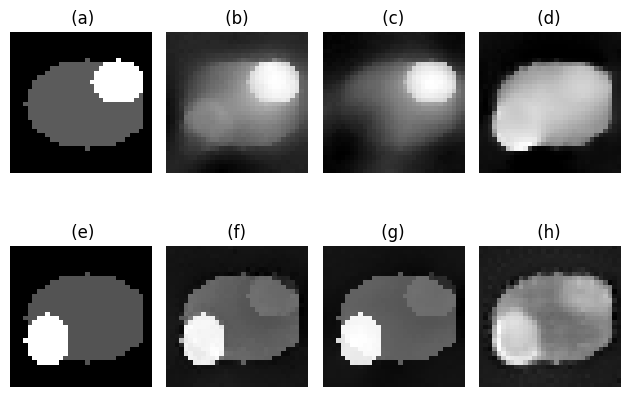

In [6]:
index = 1
itt = 3

# get GT for water
phantom = phantoms[index]  # Get the ith phantom
phantom_water = phantom[1].transpose()  # Get the water phantom
phantom_bone = phantom[0].transpose()  # Get the bone phantom

# get best iterative image
reconstruction = reconstructions[index]  # Get the ith reconstruction
best_bone_image , best_water_image, rms = get_best_image(reconstruction, phantom_bone, phantom_water)

# last iterative image
_, nMats, nIterates = reconstruction.shape
images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order = 'F')
last_water_image = images[:, :, :, 1, -1]  # Get the last water image
last_bone_image = images[:, :, :, 0, -1]  # Get the last bone image

model_image = model_images[index][itt]  # Get the ith output image
model_bone = model_image[0]  # Get the bone part of the model imag
model_water = model_image[1]  # Get the water part of the model image

# display ONLY water images
# get constant colorbar for all images
plt.subplot(2, 4, 1)
plt.imshow(phantom_water[:,:,objectSize//2], cmap='gray')
plt.title(' (a)')
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(best_water_image[:,:,objectSize//2], cmap='gray')
plt.title(f' (b) ')
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(last_water_image[:,:,objectSize//2], cmap='gray')
plt.title(' (c) ')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(model_water[:,:,objectSize//2], cmap='gray')
plt.title(f' (d) ')
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(phantom_bone[:,:,objectSize//2], cmap='gray')
plt.title(' (e)')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(best_bone_image[:,:,objectSize//2], cmap='gray')
plt.title(f' (f) ')
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(last_bone_image[:,:,objectSize//2], cmap='gray')
plt.title(' (g) ')
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(model_bone[:,:,objectSize//2], cmap='gray')
plt.title(f' (h) ')
plt.axis('off')
plt.tight_layout()
plt.show()



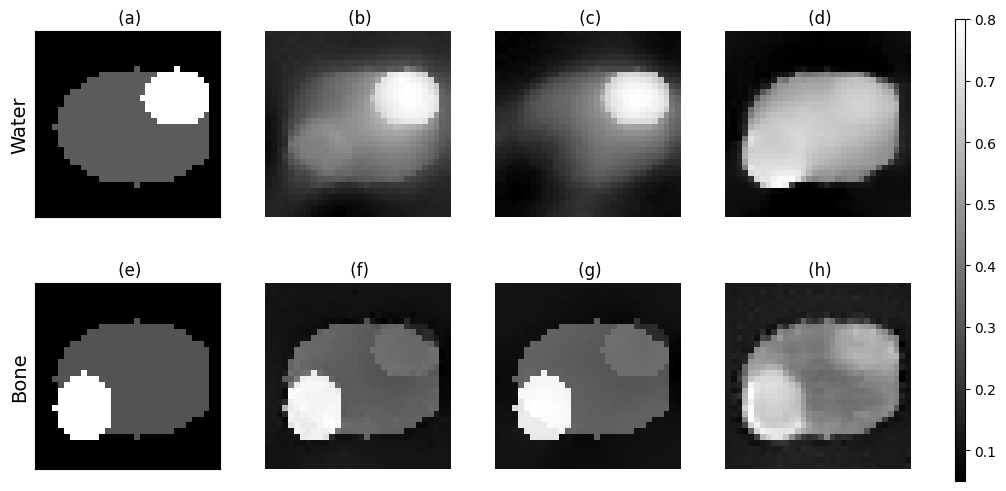

In [7]:
# | label: plotPhantom

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 6))
# make label size 14
plt.rcParams['axes.labelsize'] = 14
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.3)

# First row
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(phantom_water[:, :, objectSize//2], cmap='gray')
ax1.set_title(' (a)')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('Water')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(best_water_image[:, :, objectSize//2], cmap='gray')
ax2.set_title(' (b)')
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(last_water_image[:, :, objectSize//2], cmap='gray')
ax3.set_title(' (c)')
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
ax4.imshow(model_water[:, :, objectSize//2], cmap='gray')
ax4.set_title(' (d)')
ax4.axis('off')

# Second row
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(phantom_bone[:, :, objectSize//2], cmap='gray')
ax5.set_title(' (e)')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylabel('Bone')

ax6 = fig.add_subplot(gs[1, 1])
ax6.imshow(best_bone_image[:, :, objectSize//2], cmap='gray')
ax6.set_title(' (f)')
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
ax7.imshow(last_bone_image[:, :, objectSize//2], cmap='gray')
ax7.set_title(' (g)')
ax7.axis('off')

ax8 = fig.add_subplot(gs[1, 3])
ax8.imshow(model_bone[:, :, objectSize//2], cmap='gray')
ax8.set_title(' (h)')
ax8.axis('off')

# Add colorbar on dedicated axis (right column)
cax = fig.add_subplot(gs[:, 4])
fig.colorbar(im, cax=cax)

# fig.tight_layout()
plt.show()



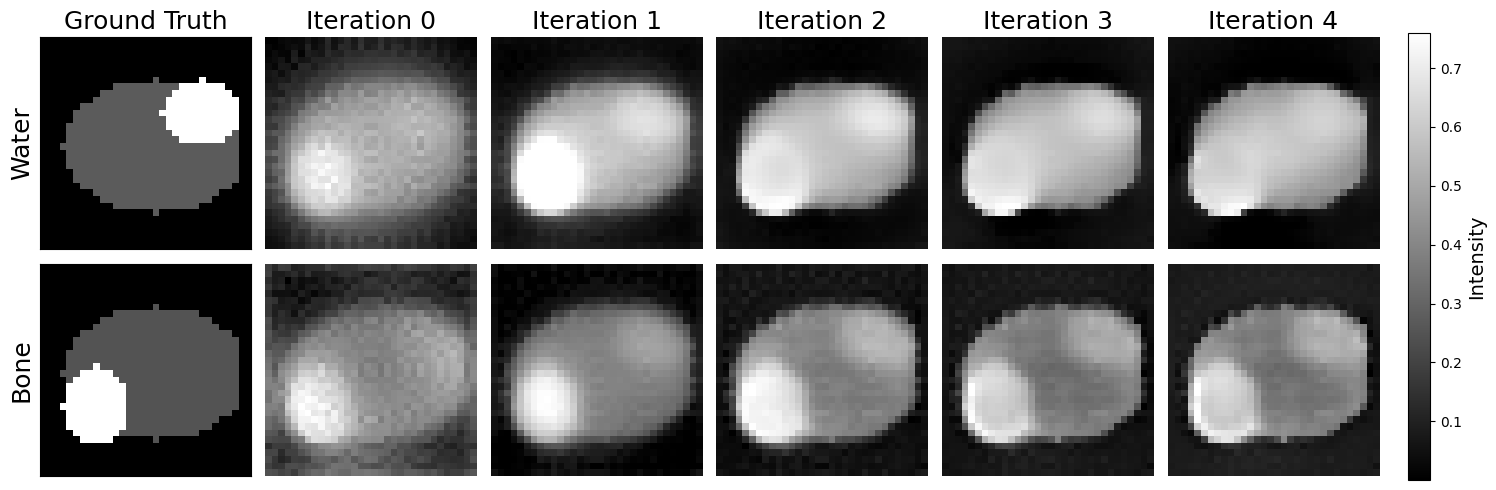

In [17]:
#| label: bone_reconstructions
import matplotlib.pyplot as plt
import numpy as np

images = model_images[1]
reconstruction = reconstructions[index]  # Get the ith reconstruction
images_r = reconstruction.reshape((objectSize, objectSize, objectSize, 2, -1), order='F')  # Reshape to (objectSize, objectSize, objectSize, nMats, nIterates)

first_water = images_r[:, :, :, 1, 0]  # Get the last water image
first_bone = images_r[:, :, :, 0, 0]  # Get the last bone image

len_images = 5

fig, axes = plt.subplots(2, len_images+1, figsize=(15, 5))

# make label size 14
plt.rcParams['axes.labelsize'] = 14
# We'll store the last image displayed for colorbar reference
im = None

for i in range(len_images-1):
    # Top row (second index 1)
    im = axes[0, i+2].imshow(images[i][1][:, :, objectSize // 2], cmap='gray')
    axes[0, i+2].set_title(f'Iteration {i+1}', fontsize=18)
    axes[0, i+2].axis('off')
    # Bottom row (first index 0)
    axes[1, i+2].imshow(images[i][0][:, :, objectSize // 2], cmap='gray')
    axes[1, i+2].axis('off')

# add iteration 0 images
axes[0, 1].imshow(first_water[:, :, objectSize // 2], cmap='gray')
axes[0, 1].set_title('Iteration 0', fontsize=18) 
axes[1, 1].imshow(first_bone[:, :, objectSize // 2], cmap='gray')
# Add titles for the first column
axes[0, 1].axis('off')
axes[1, 1].axis('off')

# ground truth at [0, 0] and [1, 0]
axes[0, 0].imshow(phantoms[1][1].transpose()[:, :, objectSize // 2], cmap='gray')
axes[0, 0].set_title('Ground Truth', fontsize=18)
axes[1, 0].imshow(phantoms[1][0].transpose()[:, :, objectSize // 2], cmap='gray')
# axes[0, 0].axis('off')
# axes[1, 0].axis('off')

# add general label to y-axis of each row, of the axis in general
axes[0, 0].set_ylabel('Water', fontsize=18)
axes[1, 0].set_ylabel('Bone', fontsize=18)

# turn off x-axis labels for all but the last column
for ax in axes[0, :-1]:
    ax.set_xticks([])
    ax.set_yticks([])
for ax in axes[1, :-1]:
    ax.set_xticks([])
    ax.set_yticks([])


plt.tight_layout()

# Add a single colorbar on the right, aligned to the height of the figure
cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label('Intensity')

plt.show()
